In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import re
import os


In [2]:
def findFilesInFolder(path, pathList, extension, subFolders = True):
    import os
    """  Recursive function to find all files of an extension type in a folder (and optionally in all subfolders too)

    path:        Base directory to find files
    pathList:    A list that stores all paths
    extension:   File extension to find
    subFolders:  Bool.  If True, find files in all subfolders under path. If False, only searches files in the specified folder
    """

    try:   # Trapping a OSError:  File permissions problem I believe
        for entry in os.scandir(path):
            if entry.is_file() and entry.path.endswith(extension):
                pathList.append(entry.path)
            elif entry.is_dir() and subFolders:   # if its a directory, then repeat process as a nested function
                pathList = findFilesInFolder(entry.path, pathList, extension, subFolders)
    except OSError:
        print('Cannot access ' + path +'. Probably a permissions error')

    return pathList

In [3]:
def uniform_distr(dataset,num_samples=100500):
    """  Function to select no more then preset number of samples for each score variant

    dataset:     Dataset
    num_samples  Number of samples for each score variant
    """
    import random
    import pandas as pd
    score_list= [[] for i in range(11)]   #change if scoring values are different from 0-10
    uniform_distr_dataset=pd.DataFrame(columns=dataset.columns.values)
    for i in range (0,dataset.shape[0]):
        score_list[int(dataset.iloc[i,2])].append(i)
    for score in range(0,11):             #change if scoring values are different from 0-10
        if len(score_list[score]) < num_samples:
            num_samples_tmp = len(score_list[score])
        else:
            num_samples_tmp = num_samples
        selected_samples=random.sample(score_list[score],num_samples_tmp)
        uniform_distr_dataset=uniform_distr_dataset.append(dataset.iloc[selected_samples,:],ignore_index=True)
    return uniform_distr_dataset

###### Next section will allow to play with the model and rate reviews without loading the whole data, processing it and training the model. Answering YES will terminate the script.

In [4]:
def play_with_me():
    """This function allows to play with the model and rate reviews without loading the whole data, 
        processing it and training the model. clean_review function definition and all module 
        imports were copied here without moving only for keeping the sctructure of the code easier to
        understand.
     """
     

    # model reconstruction from JSON:
    from tensorflow.keras.models import model_from_json
    f = open('model.json', "r")
    json_string=f.read()
    model = model_from_json(json_string)

    #load model weights
    model.load_weights('models_e20_l2.55.hdf5')

    #Loading the Bag of Words model
#    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.feature_extraction.text import CountVectorizer
    import pickle
    cv = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("vocabulary.pkl", "rb")))
     
    #Rating few examples
    review_example_1 = "Лиззи Магуайр  Люблю актрису-певицу Хилари Дафф. Все фильмы по-своему интересны. Но 'Фильм Лиззи Магуайер' меня очень зацепил!  События происходят в «сердце» Италии – Риме. Совсем случайно, Лиззи превращается на время в суперзвезду, пока настоящая звезда – Изабелла Париджи отдыхает на острове. Все были поражены новым имиджем Изабеллы. Она выглядит как школьница… На протяжении фильма, Лиззи старается вести себя как настоящая звезда. Чтобы никто ничего не заподозрил. Но девушка не подозревает, что Паоло – бывший парень Изабеллы, использует Лиззи. Он хочет выставить Изабеллу посмешищем и убрать её со сцены. Почему меня зацепил фильм? Очень понравился конец фильма. Когда Лиззи выступает на сцене... Замечательная комедия с красивыми видами на Рим! И нельзя не отметить, что игра актёров бесподобна! Всем фанатам Хилари Дафф - обязательно смотреть!"
    rate_example_1 = 10
    review_example_2 = "На момент прекрасного 2003 года, когда Вачовски ещё были братьями, а не сёстрами, алчные боссы голливудских киностудий всё чаще задумывались о том, как бы выжить из успешной кинофраншизы побольше денег. Я из числа тех зрителей, которые считают вторую «Матрицу» ничуть не хуже первой, и интригующий финал «Перезагрузки» держал меня в нетерпении. Такая необыкновенная история, в которой великолепно смешаны киберпанк и постапокалиптика, обещала так же необыкновенно и закончиться, но… этого не случилось! Сегодня мы можем сколько угодно выдвигать догадки о том, каким изначально был сценарий третьей «Матрицы», но факт остаётся фактом: третья часть самым неподобающим образом похоронила легендарную франшизу, которая будет актуальна всё третье тысячелетие. Осознание неизбежной трагедии подкрадывается постепенно. Первая треть «Революции» даже радует эпизодами с Проводником и Меровингеном, а также коротким диалогом Нео с отцом счастливого семейства, получившего возможность покинуть виртуальный мир. Но радость длится недолго – уже скоро зелёный мир иллюзий начнёт всё реже баловать зрителей своим присутствием, зато суровая, окрашенная в синий цвет реальность выйдет на передний план, и этим самым уничтожит всю философию – как раз то, что основная зрительская масса высоко ценила в первых двух «Матрицах». Но ведь именно благодаря поводу к размышлениям кино Вачовских было обязано своему широкомасштабному успеху! Сказать бы это ещё тем, кто причастен к созданию итогового сценария «Революции». Судя по всему, даже те, кто не любит размышлений, оказались разочарованы третьей «Матрицей». Стоит, конечно, обратить внимание на то, что это первый фильм, вышедший в высоком качестве, а зрелищности в нём хоть отбавляй, но во всём этом уже нет никакого смысла. И Нео, и Морфеус, и агент Смит потеряли свою колоритность ради того, чтобы происходящее выглядело пафоснее. Улыбки и злорадство Смита теперь выглядят абсолютно недостоверными, и если раньше этот примечательный антагонист радовал нас своими скрытыми намерениями, то теперь он выставляет всего себя напоказ. И что же выходит? А выходит то, что не такой уж Смит и интересный персонаж. То же самое касается Нео и остальных положительных героев. Первый – банальный счастливчик, от которого зависит судьба обоих миров, вторые – типичные борцы за свободу, которыми американские блокбастеры переполняются ещё со времён «Дня Независимости» 1996 года. Что ж. Можно сколько угодно распинаться о том, что Киану Ривз, Хьюго Уивинг, Кэрри-Энн Мосс и Лоренс Фишбёрн по-прежнему играют великолепно, а добавившиеся к актёрскому составу Мэри Элис и Брюс Спенс радуют ничуть не меньше, но по факту все они не вытягивают «Революцию» даже на отметку «удовлетворительно». Слишком много изменений в концепции было сделано для того, чтобы привлечь зрителей пафосом и зрелищностью. Одно только музыкальное сопровождение Дона Дэвиса по-прежнему не лишает события оттенков загадочности. Спасибо хотя бы за это. Как видно, «Революция» не станет последним фильмом во вселенной Матрицы. Хочется верить, что в четвёртой части не будет допущено тех же ошибок, и неправильно закончившиеся истории Нео и Вачовски станут для режиссёров и сценаристов всего мира наглядным примером того, как не стоит поступать с ростками гениальности."
    rate_example_2 = 4
    #This example is not from the dataset and could not be seen by the ANN during training or validation.
    review_example_3 = "Хорошо, что не видела описание, было бы не интересно. Искала фильм про благородство, гугл предложил варианты и я выбрала его! Что же такое благородство? Интернет дает такое определение: Высокая нравственность, соединённая с самоотверженностью и честностью. И ведь именно об этом фильм. О человеке, работнике банка, управленцев, выбравшего в будущие жены своенравную и упрямую девушку. В те времена, в Америке был конфликт между 'южанами' и северным народом Америки. Режиссер показал явно различия между ними. Они состояли в том, что люди устраивали дуэли на юге, чего не было на севере страны. Так вот по сюжету первый раз свое благородство проявил Престон, когда Джули решила наперекор ему и обществу пойти на бал в красном платье, вместо белого. Он выдержал все требования и они ушли домой с неким позором. После этой выходки он проводил ее домой по всем правилам этикета. Но затем он уехал из города и через год вернулся с супругой из Нью Йорка.  Второй раз проявил благородство - это дуэль ради чести, из которой он вышел победителем, убив человека. После этого осознав всю горечь поступка. Можно сказать, что фильм оправдывает термин 'благородство'."
    rate_example_3 = 8
    
    #Cleaning the text
    #nltk.download('stopwords') #download stopwords list
    from nltk.corpus import stopwords
    from nltk.stem.snowball import SnowballStemmer   #Russian stemmer
    #from nltk.stem.porter import PorterStemmer  #English stemmer
    def clean_review(review):
        cleaned_review=re.sub('[^а-яёА-Я]',' ',review) #replacing all characters and symbols except letters with spaces
        cleaned_review = cleaned_review.lower() #replacing all letters with lower cases
        cleaned_review=re.sub('ё','е',cleaned_review) #replacing ё with е
        cleaned_review = cleaned_review.split()
        stemmer=SnowballStemmer("russian") 
        cleaned_review = [stemmer.stem(word) for word in cleaned_review if not word in set(stopwords.words('russian'))]
        cleaned_review = ' '.join(cleaned_review)
        return cleaned_review

    def rate_example(review_example,rate_example):
        print ('\nRating review:', review_example)
        print ('Actual rate:', rate_example)
        cleaned_example = [clean_review(review_example)]
        X_example = cv.transform(cleaned_example).toarray()
        #cv.inverse_transform(X_example) #reverse tranformation
        y_exapmle=model.predict(X_example)
        print('Predicted rating =  {:.2f} '.format(y_exapmle[0,0]))
        perc_error = abs(y_exapmle[0,0] - rate_example)/10*100
        print('% eror =  {:.2f} \n'.format(perc_error))
    
    rate_example(review_example_1,rate_example_1)
    rate_example(review_example_2,rate_example_2)
    print('This example is not from the dataset and could not be seen by the ANN during training or validation.')
    rate_example(review_example_3,rate_example_3)
    
    import sys
    sys.exit("Done")
    
    
play = (input ('Play with the model and rate reviews without loading the whole data, processing it and training the model? (Y/y for yes) ') in ['Y','y'])
if play: 
    play_with_me()

Play with the model and rate reviews without loading the whole data, processing it and training the model? (Y/y for yes) y

Rating review: Лиззи Магуайр  Люблю актрису-певицу Хилари Дафф. Все фильмы по-своему интересны. Но 'Фильм Лиззи Магуайер' меня очень зацепил!  События происходят в «сердце» Италии – Риме. Совсем случайно, Лиззи превращается на время в суперзвезду, пока настоящая звезда – Изабелла Париджи отдыхает на острове. Все были поражены новым имиджем Изабеллы. Она выглядит как школьница… На протяжении фильма, Лиззи старается вести себя как настоящая звезда. Чтобы никто ничего не заподозрил. Но девушка не подозревает, что Паоло – бывший парень Изабеллы, использует Лиззи. Он хочет выставить Изабеллу посмешищем и убрать её со сцены. Почему меня зацепил фильм? Очень понравился конец фильма. Когда Лиззи выступает на сцене... Замечательная комедия с красивыми видами на Рим! И нельзя не отметить, что игра актёров бесподобна! Всем фанатам Хилари Дафф - обязательно смотреть!
Actual r

SystemExit: Done

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
dir_name = os.getcwd()+'\data'
extension = ".csv"

pathList = []
pathList = findFilesInFolder(dir_name, pathList, extension, False)


results_df ='None'
for f in pathList:
    file_df = pd.read_csv(f)
    if type(results_df)== str:
        results_df = file_df
    else:
        results_df = results_df.append(file_df,ignore_index=True)

dataset = results_df[['Title','Review','Rate']]



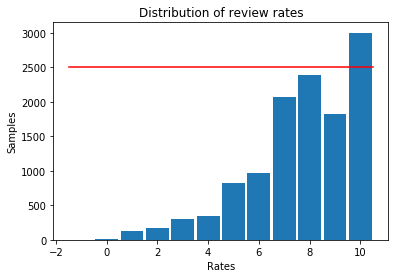

Average score: 7.7046511627906975
Number of negative scores: 1784
Number of positive scores: 10256


In [6]:
#most people write reviews to movies that they like, therefore to avoid bias toward high rates data should be normalized
samples = 2500

#visualize the distribution of review rates
import matplotlib.pyplot as plt
from collections import Counter
freqs = Counter(dataset.iloc[:,2].values)
plt.bar(freqs.keys(), freqs.values(), width=0.9)
plt.plot((np.min(dataset.iloc[:,2].values-0.5), np.max(dataset.iloc[:,2].values)+0.5),(samples,samples),'r')
plt.title('Distribution of review rates')
plt.xlabel('Rates')
plt.ylabel('Samples')
plt.show()

print('Average score:',np.mean(dataset.iloc[:,2].values))
scores_number = [0] * 11
pos_scores = 0
neg_scores = 0
for score in dataset.iloc[:,2].values:
    scores_number[int(score)] = scores_number[int(score)] + 1
    if score < 6:
        neg_scores=neg_scores + 1
    else:
        pos_scores=pos_scores + 1
print('Number of negative scores:', neg_scores)
print('Number of positive scores:', pos_scores)

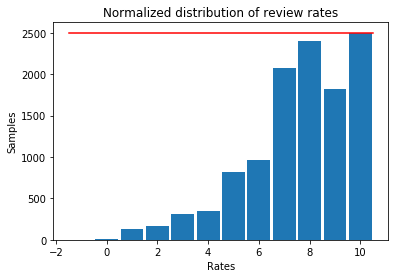

Average score: 7.604368932038835
Number of negative scores: 1784
Number of positive scores: 9752


In [7]:
dataset = uniform_distr(dataset,samples)


#visualize the normalized distribution of review rates
freqs = Counter(dataset.iloc[:,2].values)
plt.bar(freqs.keys(), freqs.values(), width=0.9)
plt.plot((np.min(dataset.iloc[:,2].values-0.5), np.max(dataset.iloc[:,2].values)+0.5),(samples,samples),'r')
plt.title('Normalized distribution of review rates')
plt.xlabel('Rates')
plt.ylabel('Samples')
plt.show()

print('Average score:',np.mean(dataset.iloc[:,2].values))
scores_number = [0] * 11
pos_scores = 0
neg_scores = 0
for score in dataset.iloc[:,2].values:
    scores_number[int(score)] = scores_number[int(score)] + 1
    if score < 6:
        neg_scores=neg_scores + 1
    else:
        pos_scores=pos_scores + 1
print('Number of negative scores:', neg_scores)
print('Number of positive scores:', pos_scores)

###### Progress bar that will be used in text cleaning because it could take some time.

In [ ]:
def update_progress(progress):
    """
    Displays or updates a console progress bar.
    Accepts a float between 0 and 1. Any int will be converted to a float.
    A value under 0 represents a 'halt'.
    A value at 1 or bigger represents 100%
    """
    
    import sys
    barLength = 20 # Modify this to change the length of the progress bar
    status = ""
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if progress >= 1:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\rProgress: [{0}] {1:.2f}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    sys.stdout.write(text)
    sys.stdout.flush()

In [9]:
#Cleaning the text
#nltk.download('stopwords') #download stopwords list
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer   #Russian stemmer
#from nltk.stem.porter import PorterStemmer  #English stemmer

def clean_review(review):
    cleaned_review=re.sub('[^а-яёА-Я]',' ',review) #replacing all characters and symbols except letters with spaces
    cleaned_review = cleaned_review.lower() #replacing all letters with lower cases
    cleaned_review=re.sub('ё','е',cleaned_review) #replacing ё with е
    cleaned_review = cleaned_review.split()
    stemmer=SnowballStemmer("russian") 
    cleaned_review = [stemmer.stem(word) for word in cleaned_review if not word in set(stopwords.words('russian'))]
    cleaned_review = ' '.join(cleaned_review)
    return cleaned_review

reviews_corpus = []
for i in range(0,dataset.shape[0]):
    review = dataset['Review'][i]
    cleaned_review = clean_review(review)
    reviews_corpus.append(cleaned_review)
    update_progress(i/dataset.shape[0])

Progress: [####################] 99.99% 

In [10]:
#Creating the Bag of Words model
vocabulary_size=4000
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=vocabulary_size)
X = cv.fit_transform(reviews_corpus).toarray()
vocabulary=cv.vocabulary_              #vocabulary
word_list=cv.get_feature_names()       #ordered word list
y=dataset.iloc[:,2].values

#Save CountVectorizer vocabulary
import pickle
pickle.dump(cv.vocabulary_,open("vocabulary.pkl","wb"))

In [11]:
#spliting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0) 

import numpy as np
X_train = np.asarray(X_train).astype('float64')
X_test = np.asarray(X_test).astype('float64')
y_train = np.asarray(y_train).astype('float64')
y_test = np.asarray(y_test).astype('float64')

In [12]:
# Sequential API
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint

In [13]:
#record the computation time for each epoch
import time
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()


#Learning Rate Reduction
#reduce the LR when loss will not decrease for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='loss',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

#save the best model according to the performance of val_loss
#checkpoint = [ModelCheckpoint(filepath='models.hdf5',
#                              save_best_only=True,
#                              monitor='val_loss])

#save every epoch’s model's weights as its own file
checkpoint = ModelCheckpoint(filepath='models_e{epoch:02d}_l{val_loss:.2f}.hdf5')


callbacks=[time_callback, learning_rate_reduction, checkpoint]



In [14]:
modelLD = models.Sequential()
modelLD.add(layers.Dense(256, activation='relu', input_shape=(vocabulary_size,)))
modelLD.add(layers.Dropout(0.25))
modelLD.add(layers.Dense(256, activation='relu'))
modelLD.add(layers.Dropout(0.25))
modelLD.add(layers.Dense(256, activation='relu'))
modelLD.add(layers.Dropout(0.25))
modelLD.add(layers.Dense(1, activation='linear'))

modelLD.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

modelLD.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1024256   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

In [15]:
# save the architecture of a model as JSON
json_string = modelLD.to_json() 
f=open('model.json','w')
f.write(json_string)
f.close()

In [16]:
historyLD = modelLD.fit(X_train,
                      y_train,
                      epochs=20, 
                      batch_size=8,
                      validation_data=(X_test, y_test),
                      callbacks=callbacks)


Train on 9228 samples, validate on 2308 samples
Epoch 1/20
9228/9228 [==============================] - 5s 578us/sample - loss: 6.1390 - mean_absolute_error: 1.9141 - val_loss: 3.1495 - val_mean_absolute_error: 1.3830
Epoch 2/20
9228/9228 [==============================] - 5s 518us/sample - loss: 2.7723 - mean_absolute_error: 1.2910 - val_loss: 2.8459 - val_mean_absolute_error: 1.3421
Epoch 3/20
9228/9228 [==============================] - 5s 516us/sample - loss: 1.9724 - mean_absolute_error: 1.0904 - val_loss: 3.0676 - val_mean_absolute_error: 1.4066
Epoch 4/20
9228/9228 [==============================] - 5s 516us/sample - loss: 1.6144 - mean_absolute_error: 0.9913 - val_loss: 3.3227 - val_mean_absolute_error: 1.4701
Epoch 5/20
9228/9228 [==============================] - 5s 516us/sample - loss: 1.3463 - mean_absolute_error: 0.9060 - val_loss: 2.6818 - val_mean_absolute_error: 1.2812
Epoch 6/20
9228/9228 [==============================] - 5s 523us/sample - loss: 1.2101 - mean_absolute

In [17]:
timesLD=time_callback.times


maeLD = historyLD.history['mean_absolute_error']
val_maeLD = historyLD.history['val_mean_absolute_error']
lossLD = historyLD.history['loss']
val_lossLD = historyLD.history['val_loss']


epochs = range(1, len(maeLD) + 1)


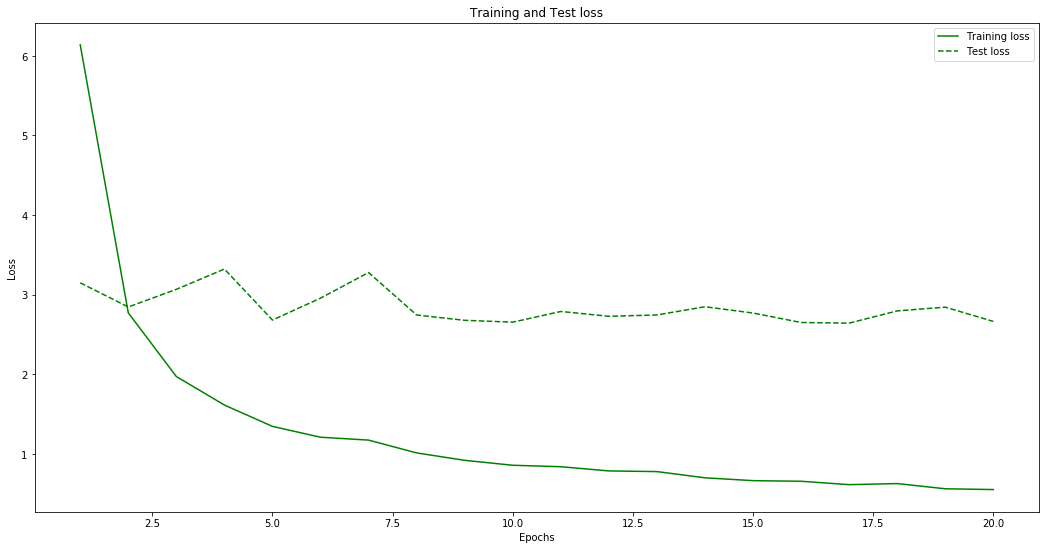

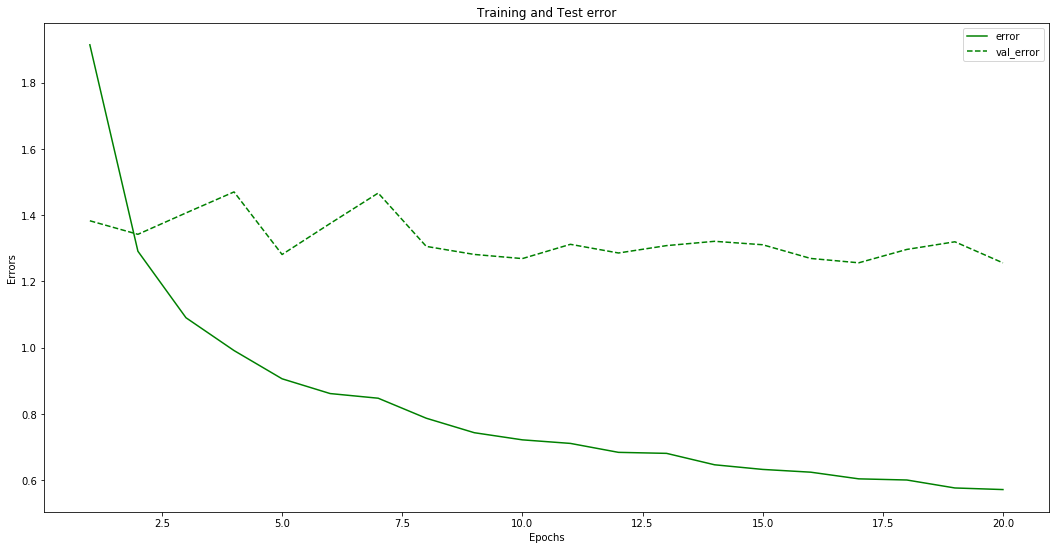

Average epoch computation time for modelLD is: 4.82


<Figure size 1296x648 with 0 Axes>

In [18]:
#Visualizing the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18,9)
#drawing Training and Test loss
plt.plot(epochs, lossLD, 'g', label='Training loss')
plt.plot(epochs, val_lossLD, 'g--', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()   # clear figure


#drawing Training and Test accuracy
plt.plot(epochs, maeLD, 'g', label='error')
plt.plot(epochs, val_maeLD, 'g--', label='val_error')
plt.title('Training and Test error')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.legend()
plt.show()
plt.clf()   # clear figure


from statistics import mean
print('Average epoch computation time for modelLD is: {:.2f}'.format(mean(timesLD)))

In [19]:
#Rate review examples
review_example_1="Лиззи Магуайр  Люблю актрису-певицу Хилари Дафф. Все фильмы по-своему интересны. Но 'Фильм Лиззи Магуайер' меня очень зацепил!  События происходят в «сердце» Италии – Риме. Совсем случайно, Лиззи превращается на время в суперзвезду, пока настоящая звезда – Изабелла Париджи отдыхает на острове. Все были поражены новым имиджем Изабеллы. Она выглядит как школьница… На протяжении фильма, Лиззи старается вести себя как настоящая звезда. Чтобы никто ничего не заподозрил. Но девушка не подозревает, что Паоло – бывший парень Изабеллы, использует Лиззи. Он хочет выставить Изабеллу посмешищем и убрать её со сцены. Почему меня зацепил фильм? Очень понравился конец фильма. Когда Лиззи выступает на сцене... Замечательная комедия с красивыми видами на Рим! И нельзя не отметить, что игра актёров бесподобна! Всем фанатам Хилари Дафф - обязательно смотреть!"
rate_example_1 = 10
review_example_2="На момент прекрасного 2003 года, когда Вачовски ещё были братьями, а не сёстрами, алчные боссы голливудских киностудий всё чаще задумывались о том, как бы выжить из успешной кинофраншизы побольше денег. Я из числа тех зрителей, которые считают вторую «Матрицу» ничуть не хуже первой, и интригующий финал «Перезагрузки» держал меня в нетерпении. Такая необыкновенная история, в которой великолепно смешаны киберпанк и постапокалиптика, обещала так же необыкновенно и закончиться, но… этого не случилось! Сегодня мы можем сколько угодно выдвигать догадки о том, каким изначально был сценарий третьей «Матрицы», но факт остаётся фактом: третья часть самым неподобающим образом похоронила легендарную франшизу, которая будет актуальна всё третье тысячелетие. Осознание неизбежной трагедии подкрадывается постепенно. Первая треть «Революции» даже радует эпизодами с Проводником и Меровингеном, а также коротким диалогом Нео с отцом счастливого семейства, получившего возможность покинуть виртуальный мир. Но радость длится недолго – уже скоро зелёный мир иллюзий начнёт всё реже баловать зрителей своим присутствием, зато суровая, окрашенная в синий цвет реальность выйдет на передний план, и этим самым уничтожит всю философию – как раз то, что основная зрительская масса высоко ценила в первых двух «Матрицах». Но ведь именно благодаря поводу к размышлениям кино Вачовских было обязано своему широкомасштабному успеху! Сказать бы это ещё тем, кто причастен к созданию итогового сценария «Революции». Судя по всему, даже те, кто не любит размышлений, оказались разочарованы третьей «Матрицей». Стоит, конечно, обратить внимание на то, что это первый фильм, вышедший в высоком качестве, а зрелищности в нём хоть отбавляй, но во всём этом уже нет никакого смысла. И Нео, и Морфеус, и агент Смит потеряли свою колоритность ради того, чтобы происходящее выглядело пафоснее. Улыбки и злорадство Смита теперь выглядят абсолютно недостоверными, и если раньше этот примечательный антагонист радовал нас своими скрытыми намерениями, то теперь он выставляет всего себя напоказ. И что же выходит? А выходит то, что не такой уж Смит и интересный персонаж. То же самое касается Нео и остальных положительных героев. Первый – банальный счастливчик, от которого зависит судьба обоих миров, вторые – типичные борцы за свободу, которыми американские блокбастеры переполняются ещё со времён «Дня Независимости» 1996 года. Что ж. Можно сколько угодно распинаться о том, что Киану Ривз, Хьюго Уивинг, Кэрри-Энн Мосс и Лоренс Фишбёрн по-прежнему играют великолепно, а добавившиеся к актёрскому составу Мэри Элис и Брюс Спенс радуют ничуть не меньше, но по факту все они не вытягивают «Революцию» даже на отметку «удовлетворительно». Слишком много изменений в концепции было сделано для того, чтобы привлечь зрителей пафосом и зрелищностью. Одно только музыкальное сопровождение Дона Дэвиса по-прежнему не лишает события оттенков загадочности. Спасибо хотя бы за это. Как видно, «Революция» не станет последним фильмом во вселенной Матрицы. Хочется верить, что в четвёртой части не будет допущено тех же ошибок, и неправильно закончившиеся истории Нео и Вачовски станут для режиссёров и сценаристов всего мира наглядным примером того, как не стоит поступать с ростками гениальности."
rate_example_2 = 4
#This example is not from the dataset and could not be seen by the ANN during training or validation.
review_example_3 = "Хорошо, что не видела описание, было бы не интересно. Искала фильм про благородство, гугл предложил варианты и я выбрала его! Что же такое благородство? Интернет дает такое определение: Высокая нравственность, соединённая с самоотверженностью и честностью. И ведь именно об этом фильм. О человеке, работнике банка, управленцев, выбравшего в будущие жены своенравную и упрямую девушку. В те времена, в Америке был конфликт между 'южанами' и северным народом Америки. Режиссер показал явно различия между ними. Они состояли в том, что люди устраивали дуэли на юге, чего не было на севере страны. Так вот по сюжету первый раз свое благородство проявил Престон, когда Джули решила наперекор ему и обществу пойти на бал в красном платье, вместо белого. Он выдержал все требования и они ушли домой с неким позором. После этой выходки он проводил ее домой по всем правилам этикета. Но затем он уехал из города и через год вернулся с супругой из Нью Йорка.  Второй раз проявил благородство - это дуэль ради чести, из которой он вышел победителем, убив человека. После этого осознав всю горечь поступка. Можно сказать, что фильм оправдывает термин 'благородство'."
rate_example_3 = 8



def rate_example(review_example,rate_example):
    print ('\nRating review:', review_example)
    print ('Actual rate:', rate_example)
    cleaned_example = [clean_review(review_example)]
    X_example = cv.transform(cleaned_example).toarray()
    #cv.inverse_transform(X_example) #reverse tranformation
    y_exapmle=modelLD.predict(X_example)
    print('Predicted rating =  {:.2f} '.format(y_exapmle[0,0]))
    perc_error = abs(y_exapmle[0,0] - rate_example)/10*100
    print('% eror =  {:.2f} \n'.format(perc_error))

rate_example(review_example_1,rate_example_1)
rate_example(review_example_2,rate_example_2)
print('This example is not from the dataset and could not be seen by the ANN during training or validation.')
rate_example(review_example_3,rate_example_3)


Rating review: Лиззи Магуайр  Люблю актрису-певицу Хилари Дафф. Все фильмы по-своему интересны. Но 'Фильм Лиззи Магуайер' меня очень зацепил!  События происходят в «сердце» Италии – Риме. Совсем случайно, Лиззи превращается на время в суперзвезду, пока настоящая звезда – Изабелла Париджи отдыхает на острове. Все были поражены новым имиджем Изабеллы. Она выглядит как школьница… На протяжении фильма, Лиззи старается вести себя как настоящая звезда. Чтобы никто ничего не заподозрил. Но девушка не подозревает, что Паоло – бывший парень Изабеллы, использует Лиззи. Он хочет выставить Изабеллу посмешищем и убрать её со сцены. Почему меня зацепил фильм? Очень понравился конец фильма. Когда Лиззи выступает на сцене... Замечательная комедия с красивыми видами на Рим! И нельзя не отметить, что игра актёров бесподобна! Всем фанатам Хилари Дафф - обязательно смотреть!
Actual rate: 10
Predicted rating =  9.44 
% eror =  5.62 


Rating review: На момент прекрасного 2003 года, когда Вачовски ещё были